In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/healthcare-dataset/healthcare_dataset.csv


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/kaggle/input/healthcare-dataset/healthcare_dataset.csv')
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [5]:
df.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')

In [6]:
# Shape and column info
df.shape, df.columns

# Check missing values
df.isnull().sum()

# Basic statistics
df.describe(include='all')

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
count,55500,55500.000000,55500,55500,55500,55500,55500,55500,55500,55500.000000,55500.000000,55500,55500,55500,55500
unique,49992,NaN,2,8,6,1827,40341,39876,5,NaN,NaN,3,1856,5,3
top,DAvId muNoZ,NaN,Male,A-,Arthritis,2024-03-16,Michael Smith,LLC Smith,Cigna,NaN,NaN,Elective,2020-03-15,Lipitor,Abnormal
freq,3,NaN,27774,6969,9308,50,27,44,11249,NaN,NaN,18655,53,11140,18627
mean,NaN,51.539459,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25539.316097,301.134829,NaN,NaN,NaN,NaN
std,NaN,19.602454,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14211.454431,115.243069,NaN,NaN,NaN,NaN
min,NaN,13.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2008.492140,101.000000,NaN,NaN,NaN,NaN
25%,NaN,35.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13241.224652,202.000000,NaN,NaN,NaN,NaN
50%,NaN,52.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25538.069376,302.000000,NaN,NaN,NaN,NaN
75%,NaN,68.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37820.508436,401.000000,NaN,NaN,NaN,NaN


In [7]:
# Drop high-cardinality and date columns
df = df.drop(['Name', 'Room Number', 'Date of Admission', 'Discharge Date'], axis=1)

# Drop rows with missing values
df = df.dropna()

# Label encode categorical columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df.select_dtypes(include='object'):
    df[col] = le.fit_transform(df[col])

In [8]:
# Features and target
X = df.drop('Billing Amount', axis=1)
y = df['Billing Amount']

In [9]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
model = LGBMRegressor()
model.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001625 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 620
[LightGBM] [Info] Number of data points in the train set: 44400, number of used features: 10
[LightGBM] [Info] Start training from score 25511.168902


LGBMRegressor()

In [11]:
# Predict
y_pred = model.predict(X_test)

# Evaluation
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))

R² Score: -0.0033142684785389953
RMSE: 14126.876311837435


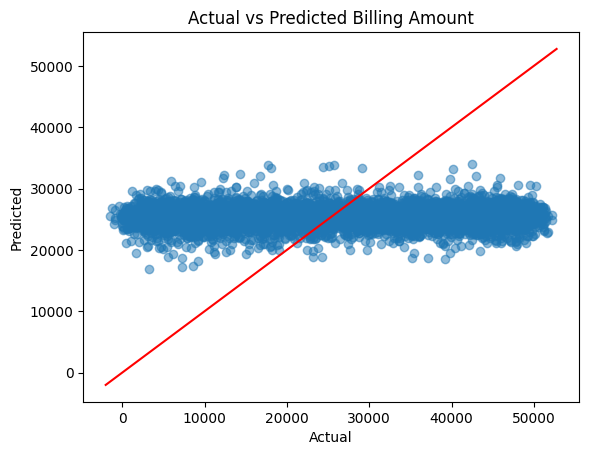

In [12]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Billing Amount")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r')
plt.show()